In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# 1. Load and Prepare Data
# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

In [3]:
# 2. Train the K-NN Regression Model
# Create a K-NN Regressor object
# We choose n_neighbors=3 as an example
knn_regressor = KNeighborsRegressor(n_neighbors=10)

# Train the model on the training data
knn_regressor.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [4]:
# 3. Predict and Evaluate
# Calculate the R-squared score to evaluate performance
train_score = knn_regressor.score(X_train, y_train)
test_score = knn_regressor.score(X_test, y_test)
y_pred = knn_regressor.predict(X_test)

### K-NN Regression Results (K=3) ###
R-squared score on the training set: 0.51
R-squared score on the test set: 0.46


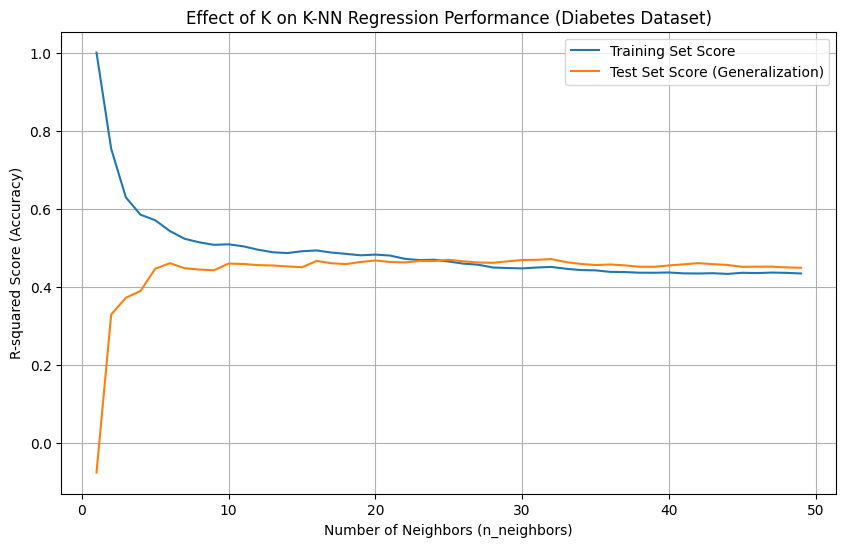

In [6]:
# 4. Display Results
print("### K-NN Regression Results (K=3) ###")
print(f"R-squared score on the training set: {train_score:.2f}")
print(f"R-squared score on the test set: {test_score:.2f}")

# Plotting model performance across different K values
# To simulate the visualization part of mglearn, we plot model performance for various K values

neighbors_settings = range(1, 50)
training_score = []
test_score_list = []

for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Store the training set score
    training_score.append(clf.score(X_train, y_train))
    # Store the generalization score (test set)
    test_score_list.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_score, label="Training Set Score")
plt.plot(neighbors_settings, test_score_list, label="Test Set Score (Generalization)")
plt.ylabel("R-squared Score (Accuracy)")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.title("Effect of K on K-NN Regression Performance (Diabetes Dataset)")
plt.legend()
plt.grid(True)
plt.show() # <-- Display the plot